In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv("C:\\Users\\91887\\Desktop\\Indian_Kids_Screen_Time.csv")

# Check if there are any missing values
data.isnull().values.any()

# count missing values in each column
data.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [9]:
print("Null Values:\n", data.isnull().sum())

Null Values:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [10]:
print("Duplicate value Rows:", data.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)
data.describe()

Duplicate value Rows: 44
(9668, 8)


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9668.000000,9668.000000,9668.000000
mean,12.992760,4.367780,0.427028
std,3.158931,1.703002,0.073185
min,8.000000,0.000000,0.300000
25%,10.000000,3.427500,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [11]:
# Display Statistical Measures
print("\nStatistical Measures:")
print(data.describe())


Statistical Measures:
               Age  Avg_Daily_Screen_Time_hr  \
count  9668.000000               9668.000000   
mean     12.992760                  4.367780   
std       3.158931                  1.703002   
min       8.000000                  0.000000   
25%      10.000000                  3.427500   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9668.000000  
mean                            0.427028  
std                             0.073185  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000  



Correlation of all numerical Columns:


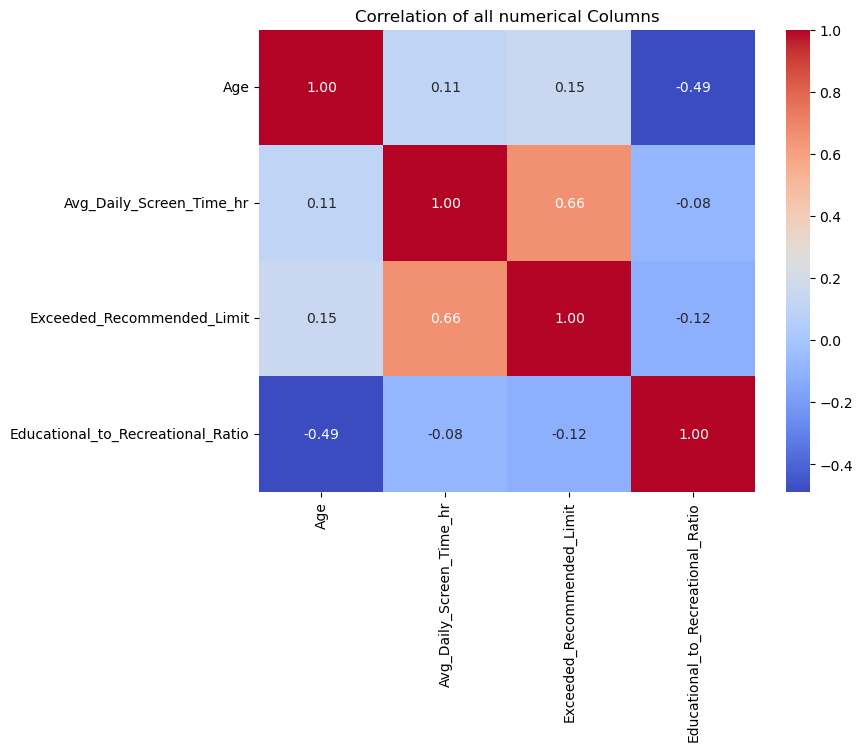

In [12]:
# Create a correlation matrix and visualize it with a heatmap
print("\nCorrelation of all numerical Columns:")
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of all numerical Columns')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


In [14]:
data.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [15]:
numeric_df = data.select_dtypes(include=["int64", "float64"])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print("IQR:\n", IQR)

IQR:
 Age                                  6.0000
Avg_Daily_Screen_Time_hr             1.9525
Educational_to_Recreational_Ratio    0.1100
dtype: float64


In [16]:
'''### Observations from Initial Analysis:
* **Missing Values**: There are **3,218 missing values** in the `Health_Impacts` column, which need to be handled.
* **Duplicates**: The dataset contained **44 duplicate rows**, which have been removed.
* **Correlation**: There is a moderate positive correlation (0.66) between `Avg_Daily_Screen_Time_hr` and `Exceeded_Recommended_Limit`, which is expected.'''

'### Observations from Initial Analysis:\n* **Missing Values**: There are **3,218 missing values** in the `Health_Impacts` column, which need to be handled.\n* **Duplicates**: The dataset contained **44 duplicate rows**, which have been removed.\n* **Correlation**: There is a moderate positive correlation (0.66) between `Avg_Daily_Screen_Time_hr` and `Exceeded_Recommended_Limit`, which is expected.'

# week 2

In [18]:
#(1)Creating Age Bands of Child, Pre-Teen,Teenager

age_bins = [7, 10, 14, 18]
age_labels = ['Child', 'Pre-Teen', 'Teenager']
data['Age_Band'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
print(data['Age_Band'])

0       Pre-Teen
1       Pre-Teen
2       Teenager
3       Teenager
4       Pre-Teen
          ...   
9707    Teenager
9708    Teenager
9709    Teenager
9710    Teenager
9711    Teenager
Name: Age_Band, Length: 9668, dtype: category
Categories (3, object): ['Child' < 'Pre-Teen' < 'Teenager']


In [19]:
# Identifying the columns with missing values
missing_cols = data.columns[data.isnull().any()]
print("Columns with missing values:", list(missing_cols))

Columns with missing values: ['Health_Impacts']


In [20]:
#As the None values are converted null when checking for null values,
#then nan values will become 3180 as there are no real null values
none_count = (data['Health_Impacts'] == 'None').sum()
print("Number of 'None' string values:", none_count)
nan_count = data['Health_Impacts'].isnull().sum()
print("Number of real NaN values:", nan_count)

Number of 'None' string values: 0
Number of real NaN values: 3180


In [21]:
# (2)Replace 'None' strings with NaN
data['Health_Impacts'] = data['Health_Impacts'].replace('None', pd.NA)

# Fill all NaN values with 'No Impacts'
data['Health_Impacts'] = data['Health_Impacts'].fillna('No Impacts')

# Verifying if the missing values are handled
print("\nMissing values after replacement:\n", data.isnull().sum())


Missing values after replacement:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
dtype: int64


In [22]:
#(3)physical and mental health
physical_keywords = ['Sleep', 'Eye', 'Posture', 'Obesity', 'Fatigue', 'Vision', 'Weight']
mental_keywords = ['Stress', 'Anxiety', 'Depression', 'Addiction', 'Behavior', 'Emotional']

#Function to extract full phrases around each keyword
def extract_full_phrases(text, keywords):
    text = str(text).lower()

    # Split text into parts using commas, "and", or semicolons
    parts = re.split(r'[;,]| and ', text)

    found = []
    for part in parts:
        for kw in keywords:
            if kw in part:
                # Clean extra spaces and save the phrase
                cleaned = part.strip()
                if cleaned not in found:
                    found.append(cleaned)

    return ', '.join(found) if found else 'No Impact'
    
data['Physical_Health'] = data['Health_Impacts'].apply(lambda x: extract_full_phrases(x, physical_keywords))
data['Mental_Health'] = data['Health_Impacts'].apply(lambda x: extract_full_phrases(x, mental_keywords))

# Verify the result
print(data[['Health_Impacts', 'Physical_Health', 'Mental_Health']].head(10))

             Health_Impacts Physical_Health Mental_Health
0    Poor Sleep, Eye Strain       No Impact     No Impact
1                Poor Sleep       No Impact     No Impact
2                Poor Sleep       No Impact     No Impact
3                No Impacts       No Impact     No Impact
4       Poor Sleep, Anxiety       No Impact     No Impact
5                Poor Sleep       No Impact     No Impact
6                No Impacts       No Impact     No Impact
7                No Impacts       No Impact     No Impact
8       Poor Sleep, Anxiety       No Impact     No Impact
9  Poor Sleep, Obesity Risk       No Impact     No Impact


In [25]:
#Create Screen Size Category
# Define the mapping from device to screen size
device_to_size_map = {
    'Smartphone': 'Small',
    'Tablet': 'Medium',
    'Laptop': 'Medium',
    'TV': 'Large'
}

In [26]:
# Apply the map to create the new column
data['Screen_Size_Category'] = data['Primary_Device'].map(device_to_size_map)

In [32]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Display all rows of the selected columns
print(data[['Age', 'Age_Band', 'Primary_Device', 'Screen_Size_Category', 'Physical_Health']])

      Age  Age_Band Primary_Device Screen_Size_Category Physical_Health
0      14  Pre-Teen     Smartphone                Small       No Impact
1      11  Pre-Teen         Laptop               Medium       No Impact
2      18  Teenager             TV                Large       No Impact
3      15  Teenager         Laptop               Medium       No Impact
4      12  Pre-Teen     Smartphone                Small       No Impact
5      14  Pre-Teen     Smartphone                Small       No Impact
6      17  Teenager             TV                Large       No Impact
7      10     Child             TV                Large       No Impact
8      14  Pre-Teen         Laptop               Medium       No Impact
9      18  Teenager         Tablet               Medium       No Impact
10     18  Teenager         Tablet               Medium       No Impact
11     15  Teenager             TV                Large       No Impact
12     12  Pre-Teen     Smartphone                Small       No

In [30]:
# Saving the updated dataset in a CSV file
data.to_csv("screen.csv", index=False)
print("\n The Cleaned Dataset is saved ")


 The Cleaned Dataset is saved 


In [31]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Physical_Health,Mental_Health,Screen_Size_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen,No Impact,No Impact,Small
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,No Impact,No Impact,Medium
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager,No Impact,No Impact,Large
3,15,Female,1.21,Laptop,False,0.39,No Impacts,Urban,Teenager,No Impact,No Impact,Medium
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,No Impact,No Impact,Small


# Summary

To prepare the dataset for analysis, several new features were engineered to enrich the data. An 'Age_Band' column was created by grouping individuals based on their age, and a 'Screen_Size_Category' was added by mapping each primary device to a logical screen size. Additionally, the 'Health_Impacts' column was processed by filling missing values with the label "No Impacts" and then extracting keywords to generate two new detailed columns: 'Physical_Health' and 'Mental_Health'. The final, cleaned, and feature-enriched dataset was then saved as a new CSV file to be used for the subsequent visualization and modeling phases.